In [ ]:
# when the y(response variable) is categorical i.e yes / no or 0/1 we use Logistic Regression to predict y

In [1]:
# import essential library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set() # no need plt.style.use('seaborn-darkgrid')

In [2]:
# SK Learn Lib
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import classification_report

In [3]:
# ROC Curve METRIX   - RECEIVER OPERATING CHARACTERISTICS

from sklearn.metrics import roc_curve       # TPR VS FPR
from sklearn.metrics import roc_auc_score


# confusion Matrix 
# prdeicted --         0     1
# actual|        0    TN    FP
#                1    FN    TP

# TPR = TP/ (TP+FN)   
# FPR = 1 - [TN / (TN+FP)] = FP/ (TN+FP)  = 1 - RECALL For 0

# ROC CURVE HELPS US UNDERSTAND THE HOW WELL MY MODEL IS GOING TO BEHAVE IN REAL TIME

In [4]:
# Split the Data

from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# load the Data & clean the data

claimant = pd.read_csv('claimants.csv')

In [ ]:
# Problem Statement : Predict weither the client will opt for Attorney or not ?

In [8]:
claimant.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [9]:
claimant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [10]:
claimant.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
# there are missing values 

In [11]:
claimant.shape

(1340, 7)

In [12]:
claimants = claimant.dropna()

In [13]:
claimants.shape

(1096, 7)

In [14]:
claimants.drop('CASENUM',axis=1,inplace=True)

In [15]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [16]:
## to Check weither the data is balanced or Not
claimants.ATTORNEY.value_counts()

0    578
1    518
Name: ATTORNEY, dtype: int64

In [ ]:
# the data is balanced i.e frequency of 0 & 1 is close

In [17]:
claimants.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [ ]:
# now no missing values

### Create Model 

In [ ]:
# y= m1x1 + m2x2 + m3x3 + m4x4 + m5X5 + c + error 
# Logistic Regression Equation = 1/(1+e^-y)

In [20]:
x = claimants.iloc[:,[1,2,3,4,5]]
y = claimants.iloc[:,0]

In [21]:
lg = LogisticRegression()   # classifier

model = lg.fit(x,y)

In [22]:
# we have 5 features hence 5 coefficient
# CLMSEX	CLMINSUR	SEATBELT	CLMAGE	LOSS

lg.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

In [23]:
lg.intercept_

array([-0.17361679])

In [24]:
model.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

In [25]:
model.intercept_

array([-0.17361679])

In [26]:
# predictions

y_pred = model.predict(x)

In [27]:
# lets make tabular form for y actual & y predict

y_df = pd.DataFrame({'Y Actual':y,'Y Predicted': y_pred})

y_df.head()

,Y Actual,Y Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


### Checking the Model Accuracy

In [ ]:
# now we have coefficient & intercept
# which model to select depends on residual (i.e y-y^)since y is binary has no numeric sense so we check the accuracy

In [ ]:
# (y,y_pred)

# confusion_matrix()
# ac()
# classification_report()

In [ ]:
# confusion Matrix
# Pred          0    1
# Actual  0    TN   FP
#         1    FN   TP

# Actual & Predicted 1 = TP = 395
# Actual & Predicted 0 = TN = 381
# Actual 1 but Predicted 0 = FN = 123
# Actual 0 but Predicted 1 = FP = 197

In [28]:
print(confusion_matrix(y,y_pred))

[[381 197]
 [123 395]]


In [29]:
# Accuracy Score  = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy Score is : ', ac(y,y_pred))

Accuracy Score is :  0.708029197080292


In [30]:
#Classification report to know the Recall & Precision
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# Precision for 1 -- TP / (TP+FP) = 395/(395+197) = 395/592 = 0.67
# Precision for 0 -- TN / (TN+FN) = 381/(381+123) = 395/592 = 0.76

# Recall for 1 -- TP / (TP+FN)  = 395 / (395+123) = 0.76
# Recall for 0 -- TN /(TN+FP)   = 381 / (381+197) = 0.66

In [ ]:
# f1 score is harmonic mean b/w recall & precision

In [ ]:
# all 4 values are close (precision of 1 & 0, recall of 1 & 0)

### ROC Curve

In [31]:
model.predict_proba(x)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [32]:
lg.predict_proba(x)[:,0]

array([0.99999695, 0.49285112, 0.42483316, ..., 0.26097133, 0.71405941,
       0.31956879])

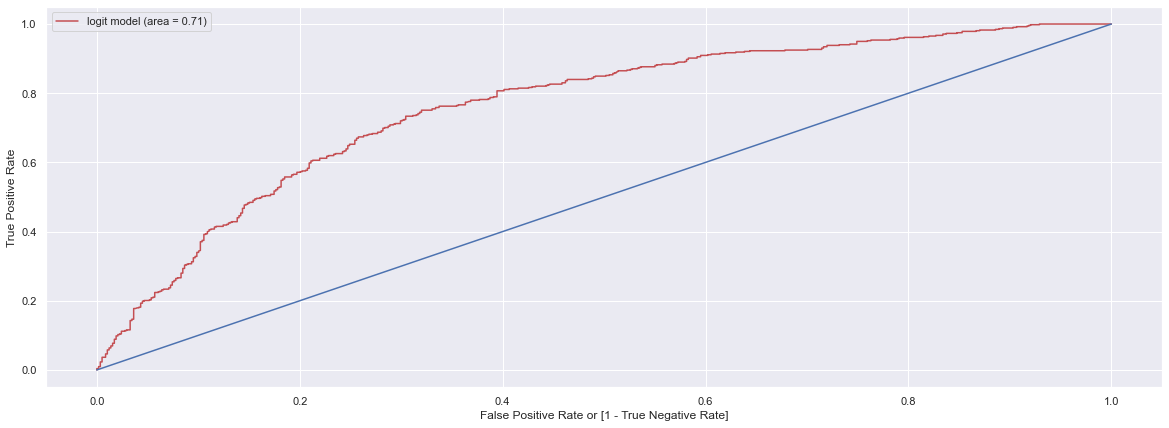

In [34]:
fpr,tpr,thresholds = roc_curve(y,model.predict_proba(x)[:,1])

# auc = area under curve
auc = roc_auc_score(y,y_pred)

plt.figure(figsize=(20,7))

plt.plot(fpr,tpr,color='r',label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

plt.legend(loc="best")


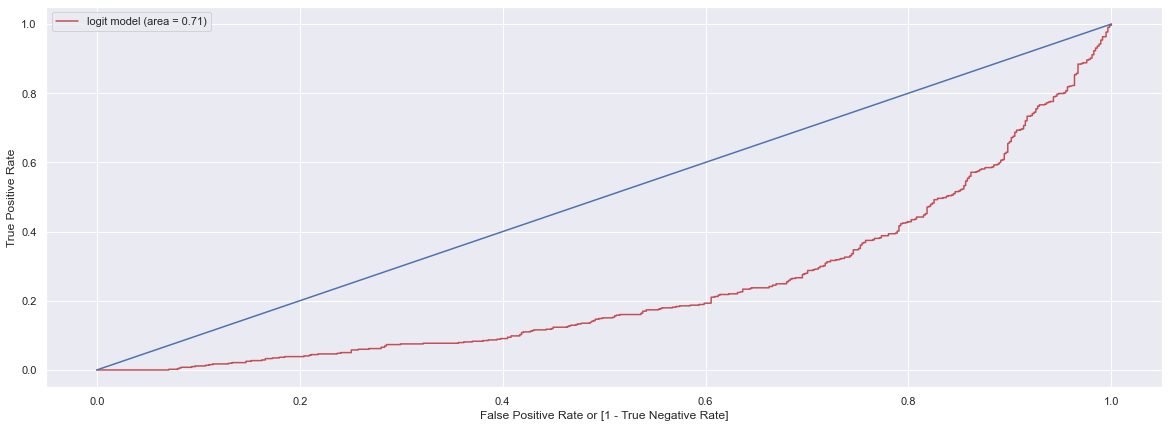

In [35]:
fpr,tpr,thresholds = roc_curve(y,model.predict_proba(x)[:,0])

# auc = area under curve

auc = roc_auc_score(y,y_pred)

plt.figure(figsize=(20,7))

plt.plot(fpr,tpr,color='r',label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

plt.legend(loc="best")

In [36]:
# auc = area under curve
auc = roc_auc_score(y,y_pred)
print('Area Under the Curve :',auc)

Area Under the Curve : 0.7108589063606365


## Multiple Classes

In [37]:
iris = sns.load_dataset('iris')

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [40]:
x = iris.iloc[:,0:4]
y = iris.iloc[:,4]

In [41]:
# Split the data in Train & test 

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,shuffle=True)

In [42]:
x_train.shape

(105, 4)

In [43]:
y_train.shape

(105,)

#### Creating a Model based on Training Data

In [44]:
classifier = LogisticRegression()

model_new = classifier.fit(x_train,y_train)

In [45]:
y_train_pred = model_new.predict(x_train)

In [46]:
y_test_pred = classifier.predict(x_test)

#### Checking Accuracy

In [47]:
ac(y_train,y_train_pred)

0.9619047619047619

In [48]:
ac(y_test,y_test_pred)

0.9333333333333333

In [ ]:
# accuracy of training & testing data is very good

In [49]:
model_new.coef_

array([[-0.42722025,  0.86588476, -2.27805626, -0.98134513],
       [ 0.29767437, -0.25953441, -0.12255027, -0.71082079],
       [ 0.12954588, -0.60635035,  2.40060653,  1.69216592]])

In [50]:
model_new.intercept_

array([  9.28208213,   2.60890595, -11.89098808])

In [51]:
set(y_train)

{'setosa', 'versicolor', 'virginica'}

In [52]:
# Create Confusion Matrix

confusion_matrix(y_train,y_train_pred)

array([[40,  0,  0],
       [ 0, 35,  1],
       [ 0,  3, 26]], dtype=int64)

In [53]:
# 
confusion_matrix(y_test,y_test_pred)

array([[10,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 19]], dtype=int64)

In [54]:
# classification report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.92      0.97      0.95        36
   virginica       0.96      0.90      0.93        29

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [55]:
# classification report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.87      0.93      0.90        14
   virginica       0.95      0.90      0.93        21

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
### ROC Curve -- Need to follow one vs All approch i.e setosa vs (versicolor+virginica as 1)

In [59]:
fpr,tpr,thresholds = roc_curve(y_train,model_new.predict_proba(x_train)[:,1])
auc = roc_auc_score(y_train,y_train_pred)
plt.plot(fpr,tpr,color='red',label='logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")

ValueError: multiclass format is not supported

In [61]:
# MULTI CLASS FORMAT IS NOT SUPPORTED 

print('Here classes are ',set(y_train))

Here classes are  {'setosa', 'virginica', 'versicolor'}
